# Experiments with CIFAR-10 Dataset

The experiments in this notebook include training the following MoE models with CIFAR-10 dataset:

1. train a single model.
2. output mixture MoE.
3. stochastic MoE.
4. top-1 MoE.
5. top-2 MoE.
6. output mixture MoE with $L_{importance}$ regularization.
7. top-2 MoE with $L_{importance}$ regularization.
8. no-gate loudest expert MoE
9. no-gate oracle expert MoE

In [1]:
import sys
sys.path.append('../src/cifar10')
sys.path.append('../src')

In [ ]:
# load expert and gate models, data and methods for training the models
from cifar10_original_moe_training import *
from original_moe_training import *
from moe_no_gate_training import *
from single_model_training import *

In [3]:
# Paths to where the trained models, figures and results will be stored. You can change this as you see fit.
fig_path = '../figures/cifar10'
model_path = '../models/cifar10'
results_path = '../results/cifar10'

if not os.path.exists(fig_path):
    os.makedirs(fig_path)
if not os.path.exists(model_path):
    os.makedirs(model_path)
if not os.path.exists(results_path):
    os.makedirs(results_path)    

In [4]:
# function to display the images
def plot_colour_images(images_to_plot, titles=None, nrows=None, ncols=6, thefigsize=(18,18)):
    # images_to_plot: list of images to be displayed
    # titles: list of titles corresponding to the images
    # ncols: The number of images per row to display. The number of rows 
    #        is computed from the number of images to display and the ncols
    # theFigsize: The size of the layour of all the displayed images
    
    n_images = images_to_plot.shape[0]
    
    # Compute the number of rows
    if nrows is None:
        nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten()
    
    for i in range(n_images):
        img = images_to_plot[i,:,:,:]
        npimg = np.clip(img.numpy(),0,1)
        ax[i].imshow(npimg)
        ax[i].axis('off')  
        if titles is not None and i<10:
            ax[i].set_title(titles[i%10])

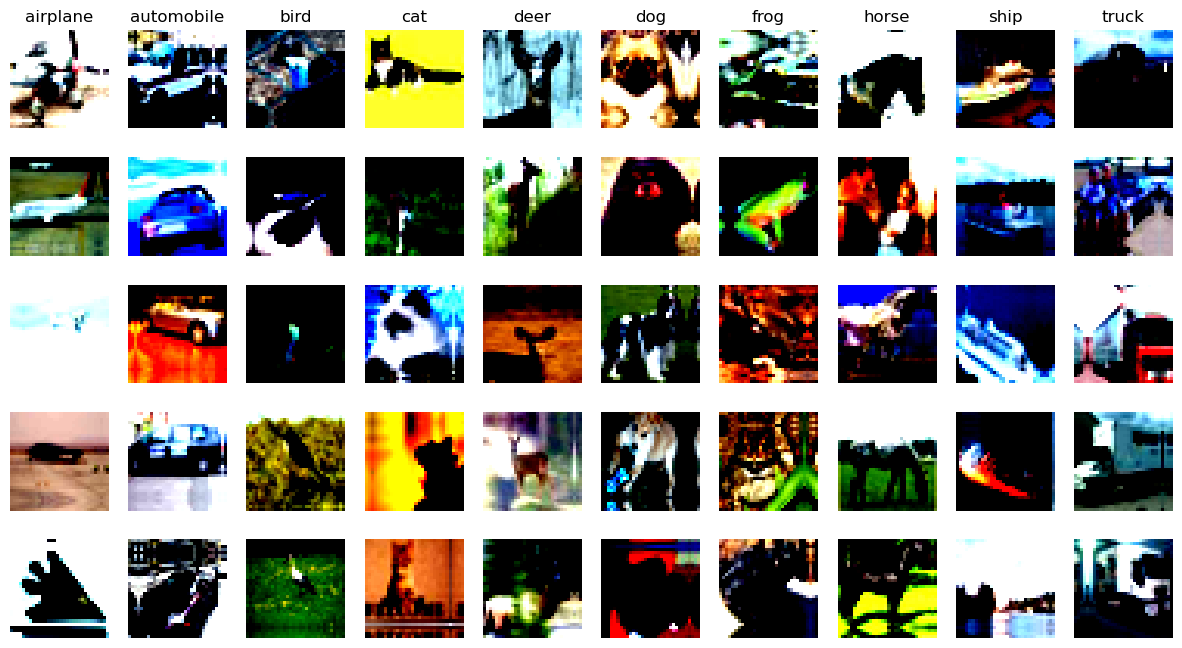

In [7]:
# get some random training images
dataiter = iter(cifar10_trainloader)
images, labels = dataiter.next()

images_to_plot = []
for i in range(0, len(classes_cifar10)):
    # pick images of each class
    index = np.where(labels==i)[0]
    if i == 0:
        images_to_plot.append(images[index[0:5],:,:])
    else:
        images_to_plot.append(images[index[0:5],:,:])
images_to_plot = torch.transpose(torch.stack(images_to_plot),0,1)
new_shape = images_to_plot.shape
images_to_plot = images_to_plot.reshape(new_shape[0]*new_shape[1], new_shape[2], new_shape[3], new_shape[4])
images_to_plot = images_to_plot.permute(0,2,3,1)

plot_colour_images(images_to_plot, nrows=5, ncols=10,thefigsize=(15,8), titles=classes_cifar10)
    


## Experiments

### Experiment 1: Training the single model

In [45]:
m = 'cifar10_single_model'

In [14]:
num_epochs = 200

In [35]:
runs = 10

In [ ]:
train_single_model(m, single_model, cifar10_trainloader, cifar10_testloader, num_classes, num_epochs, runs, model_path)

### Experiment 2: Train output mixture MoE

In [21]:
# Model with gate and expert parameters initialized to default values
m = 'cifar10_output_mixture'

In [22]:
total_experts = 5

In [15]:
num_epochs = 200

In [68]:
temps = [[1.0]*num_epochs]

In [24]:
runs = 10

In [ ]:
train_original_model(m, 'moe_expectation_model', k=0,
                     trainloader=cifar10_trainloader, testloader=cifar10_testloader, 
                     expert_layers=expert_layers, gate_layers=gate_layers, temps=temps,
                     runs=runs, num_classes=num_classes, total_experts=total_experts, num_epochs=num_epochs,
                     model_path=model_path)

### Experiment 3: Train stochastic MoE

In [41]:
# Model with gate and expert parameters initialized to default values
m = 'cifar10_stochastic'

In [42]:
total_experts = 5

In [16]:
num_epochs = 200

In [44]:
runs = 10

In [ ]:
temps = [[1.0]*num_epochs]

In [ ]:
train_original_model(m, 'moe_stochastic_model', k=0,
                     trainloader=cifar10_trainloader, testloader=cifar10_testloader, 
                     expert_layers=expert_layers, gate_layers=gate_layers, temps=temps,
                     runs=runs, num_classes=num_classes, total_experts=total_experts, num_epochs=num_epochs,
                     model_path=model_path)

### Experiment 4: Train top-1 MoE

In [46]:
# model with gate and expert parameters initialized to default values
m = 'cifar10_top_1'

In [52]:
total_experts = 5

In [17]:
num_epochs = 200

In [54]:
temps = [[1.0]*num_epochs]

In [55]:
runs = 10

In [ ]:
train_original_model(m, 'moe_top_k_model', k=1,
                     trainloader=cifar10_trainloader, testloader=cifar10_testloader, 
                     expert_layers=expert_layers, gate_layers=gate_layers_top_k, temps=temps,
                     runs=runs, num_classes=num_classes, total_experts=total_experts, num_epochs=num_epochs,
                     model_path=model_path)

### Experiment 5: Train top-2 MoE

In [57]:
# model with gate and expert parameters initialized to default values
m = 'cifar10_top_2'

In [58]:
total_experts = 5

In [18]:
num_epochs = 200

In [60]:
temps = [[1.0]*num_epochs]

In [61]:
runs = 10

In [ ]:
train_original_model(m, 'moe_top_k_model', k=2,
                     trainloader=cifar10_trainloader, testloader=cifar10_testloader, 
                     expert_layers=expert_layers, gate_layers=gate_layers_top_k, temps=temps,
                     runs=runs, num_classes=num_classes, total_experts=total_experts, num_epochs=num_epochs,
                     model_path=model_path)

### Experiment 6: Output mixture MoE trained with $L_{importance}$ regularization.

In [70]:
m = 'cifar10_output_mixture'

In [71]:
total_experts = 5

In [19]:
num_epochs = 200

In [73]:
w_importance_range = [i * 0.2 for i in range(1, 6)]

In [74]:
temps = [[1.0]*num_epochs]

In [75]:
runs = 10

In [ ]:
train_original_model(m, 'moe_expectation_model', k=0,
                     trainloader=cifar10_trainloader, testloader=cifar10_testloader, 
                     expert_layers=expert_layers, gate_layers=gate_layers,
                     w_importance_range=w_importance_range, temps=temps,
                     runs=runs, num_classes=num_classes, total_experts=total_experts, num_epochs=num_epochs,
                     model_path=model_path)

### Experiment 7: Train top-2 MoE trained with $L_{importance}$ regularization.

In [78]:
# model with gate and expert parameters initialized to default values
m = 'cifar10_top_2'

In [79]:
total_experts = 5

In [80]:
num_epochs = 200

In [82]:
w_importance_range = [i * 0.2 for i in range(1, 6)]

In [81]:
temps = [[1.0]*num_epochs]

In [61]:
runs = 10

In [ ]:
train_original_model(m, 'moe_top_k_model', k=2,
                     trainloader=cifar10_trainloader, testloader=cifar10_testloader, 
                     expert_layers=expert_layers, gate_layers=gate_layers_top_k, temps=temps,
                     w_importance_range = w_importance_range,
                     runs=runs, num_classes=num_classes, total_experts=total_experts, num_epochs=num_epochs,
                     model_path=model_path)

### Experiment 8: MoE model training with no-gate loudest expert.

In [26]:
m = 'cifar10_no_gate_loudest'

In [21]:
total_experts = 5

In [22]:
num_epochs = 200

In [23]:
runs = 10

In [24]:
temps=[[1.0]*num_epochs]

In [25]:
no_gate_temps = [[10.0]*50+[1.0]*50+[0.01]*50+[0.001]*50]

In [ ]:
# Model with gate and expert parameters initialized to default values
train_no_gate_model(m, 'moe_no_gate_entropy_model', cifar10_trainloader, cifar10_testloader, 
                    expert_layers=expert_layers, 
                    runs=runs, output_type='argmax',
                    temps=temps, no_gate_temps=no_gate_temps, 
                    num_classes=num_classes, total_experts=total_experts, 
                    num_epochs=num_epochs, model_path=model_path)

### Experiment 9: MoE model training with no-gate oracle expert.

#### Step 1 training

In [36]:
m = 'cifar10_no_gate_oracle_step_1'

In [37]:
total_experts = 5

In [38]:
num_epochs = 20

In [39]:
runs = 10

In [40]:
temps=[[1.0]*num_epochs]

In [ ]:
# model with gate and expert parameters initialized to default values
train_no_gate_model(m, 'moe_no_gate_self_information_model', cifar10_trainloader, cifar10_testloader, 
                    expert_layers=expert_layers, 
                    runs=runs, temps=temps, num_classes=num_classes, 
                    total_experts=total_experts, num_epochs=num_epochs, 
                    model_path=model_path)

#### Step 2 training

In [49]:
# model from step 1 to train from
m = 'cifar10_no_gate_oracle_step_1'

In [50]:
total_experts = 5

In [51]:
num_epochs = 180

In [52]:
runs = 10

In [ ]:
# reverse distillation of gate with pre-trained experts from model trained in step 1 with output mixture algorithm
train_from_no_gate_model(m, 0, 'moe_no_gate_self_information_model', out_model_name='moe_expectation_model',
                         trainloader=cifar10_trainloader, testloader=cifar10_testloader, 
                         expert_layers=expert_layers, gate_layers=gate_layers,
                         num_classes=num_classes, total_experts=total_experts, num_epochs=num_epochs, 
                         model_path=model_path)

## Visualising Results

Train Accuracy 0.037
Max Validation Accuracy 0.955
Min Validation Error 0.045
Mutual Information 0.000
Sample Entropy 0.000
Expert Usage 2.244
Best model index 4
cifar10_no_gate_self_information_10_5_models.pt


<Figure size 640x480 with 0 Axes>

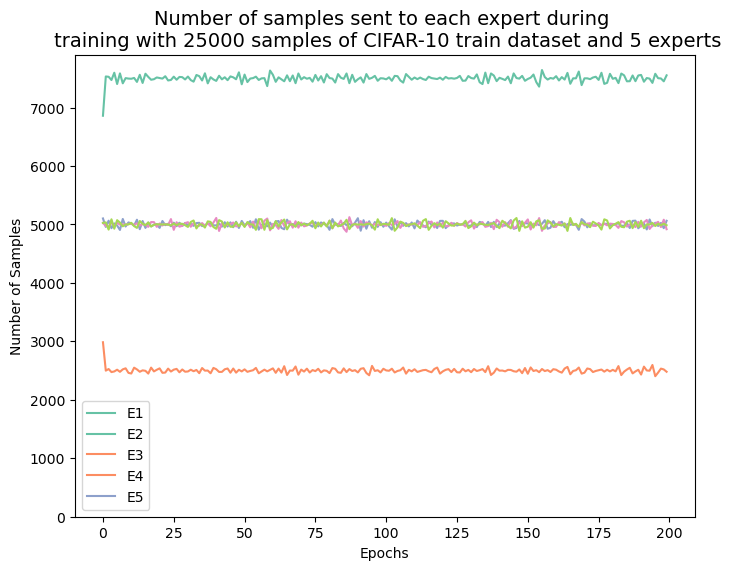

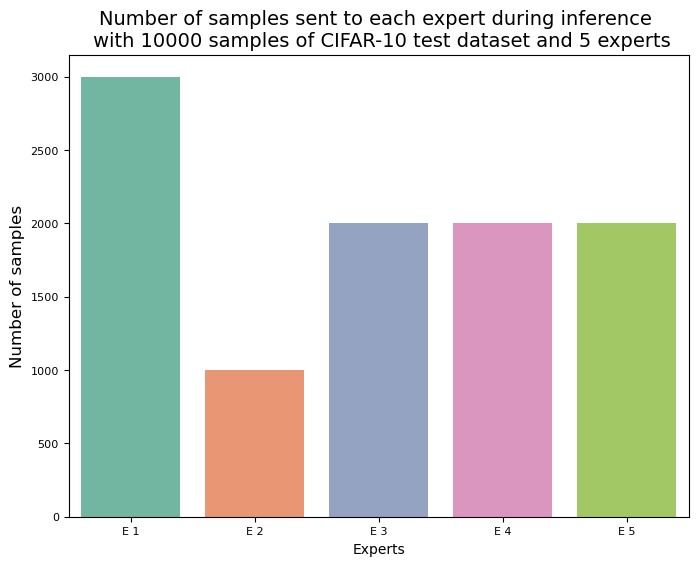

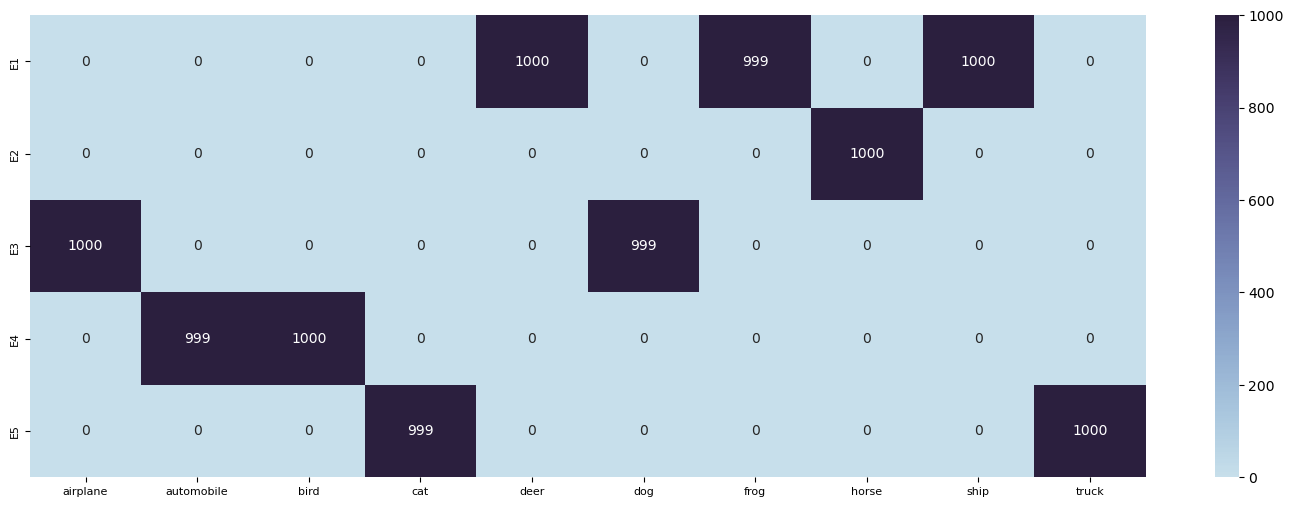

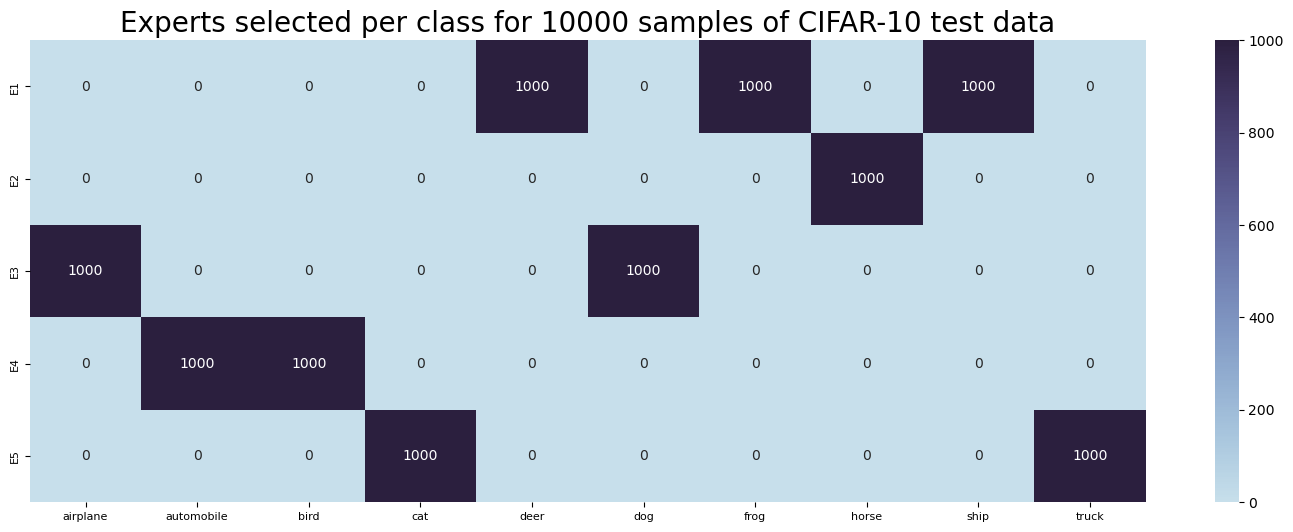

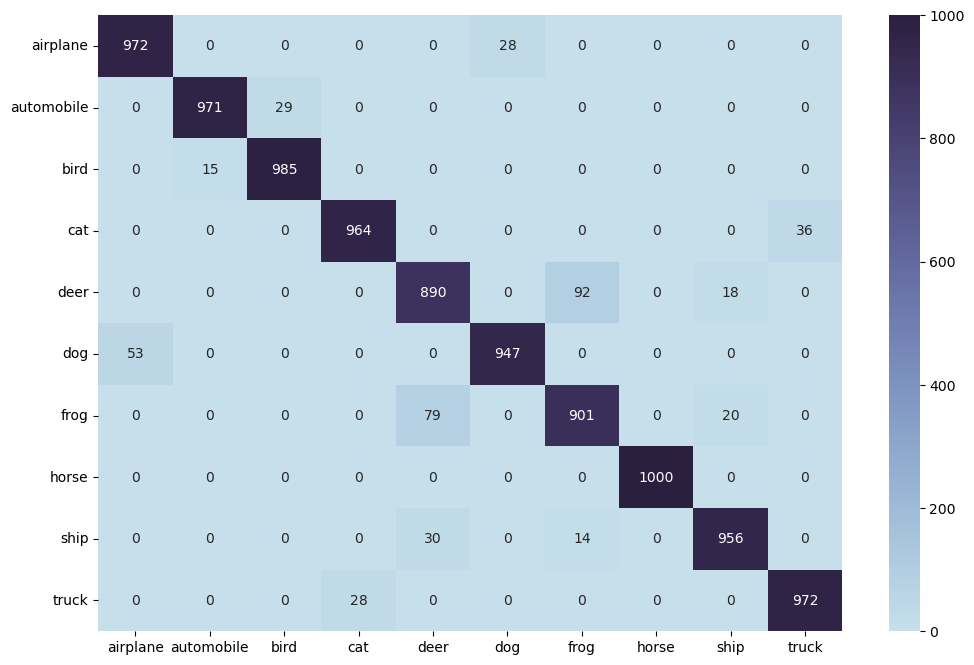

In [60]:
# model from step 1 oracle expert training with 5 experts
m = 'cifar10_no_gate_self_information'

total_experts = 5
classes = classes_cifar10
num_epochs = 200
temps = [[1.0]*num_epochs]
test_loader = cifar10_testloader

w_importance_range = [0]

plot_expert_usage(m, 'moe_no_gate_self_information_model', test_loader=test_loader, temps=temps,
                  w_importance_range=w_importance_range, 
                  total_experts=total_experts,num_classes=num_classes,
                  classes=classes, num_epochs=num_epochs, 
                  fig_path=fig_path, model_path=model_path, 
                  dataset='CIFAR-10',  device=device)


Train Accuracy 0.043
Max Validation Accuracy 0.834
Min Validation Error 0.166
Mutual Information 0.000
Sample Entropy 0.027
Expert Usage 2.246
Best model index 8
new_cifar10_no_gate_self_information_10_5_models.pt


<Figure size 640x480 with 0 Axes>

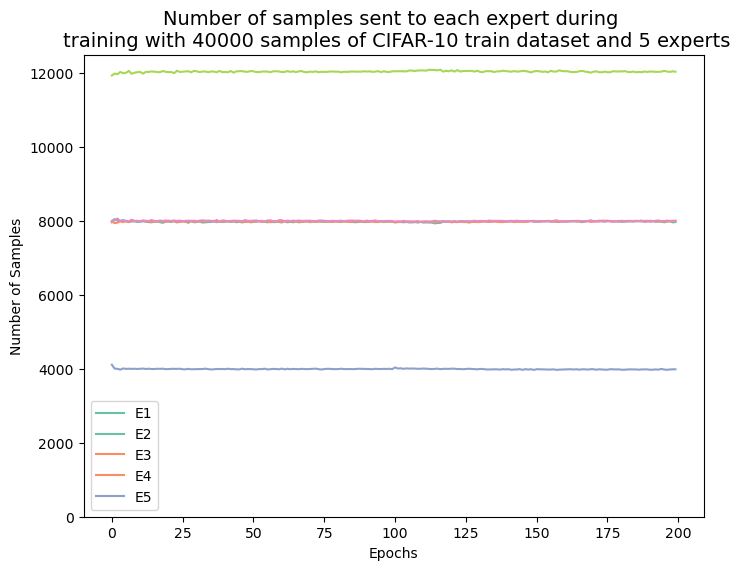

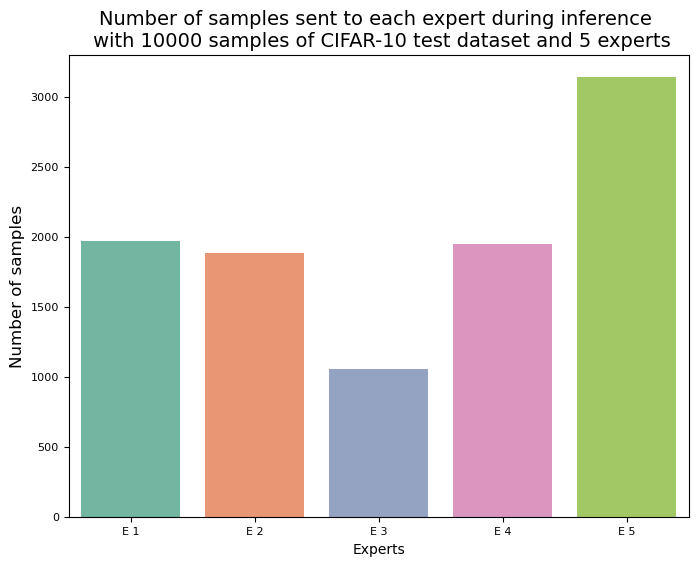

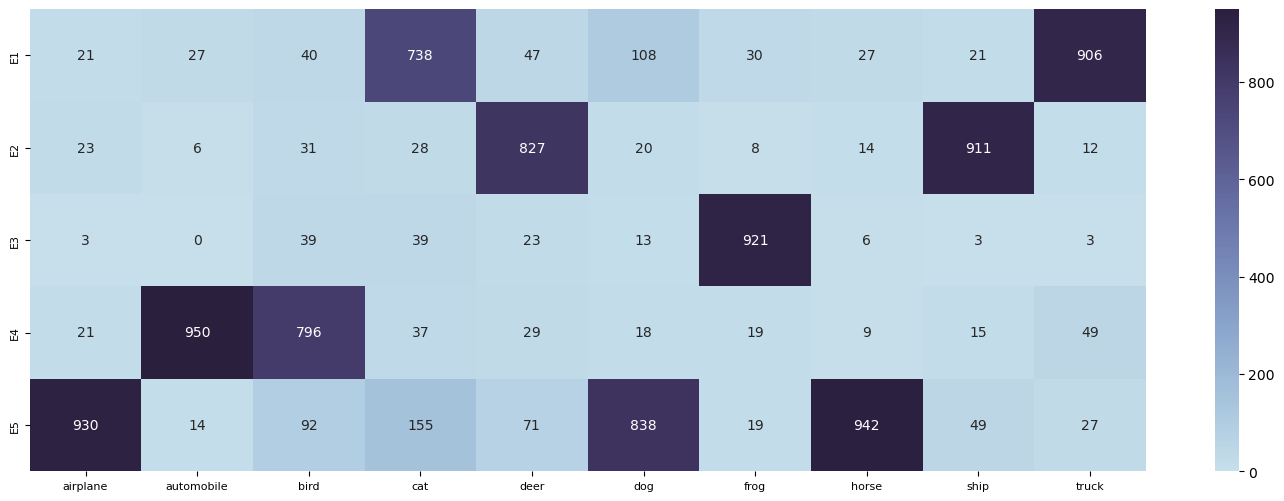

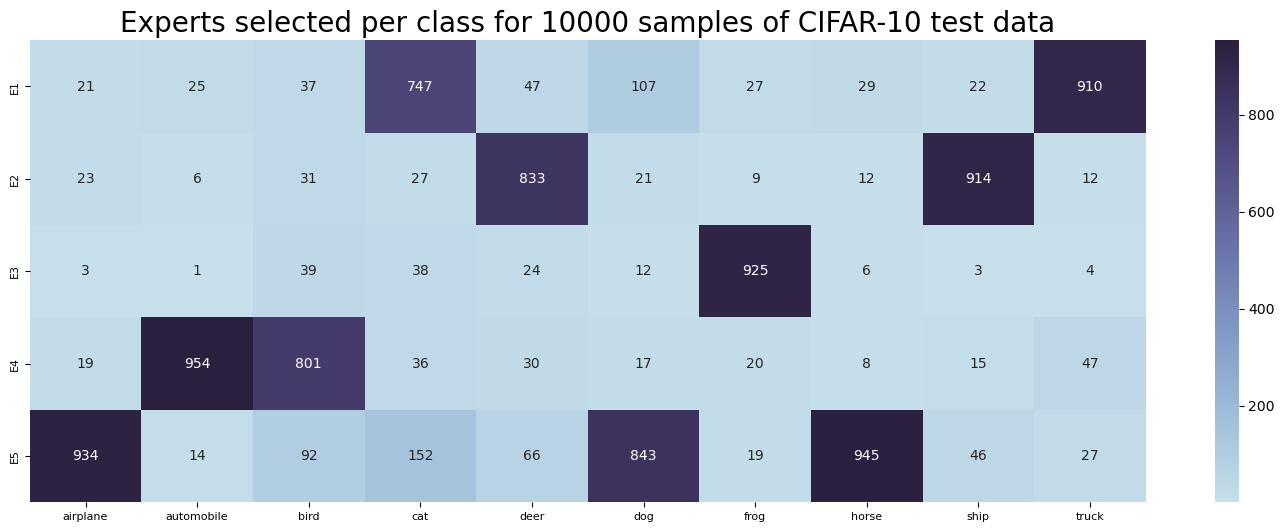

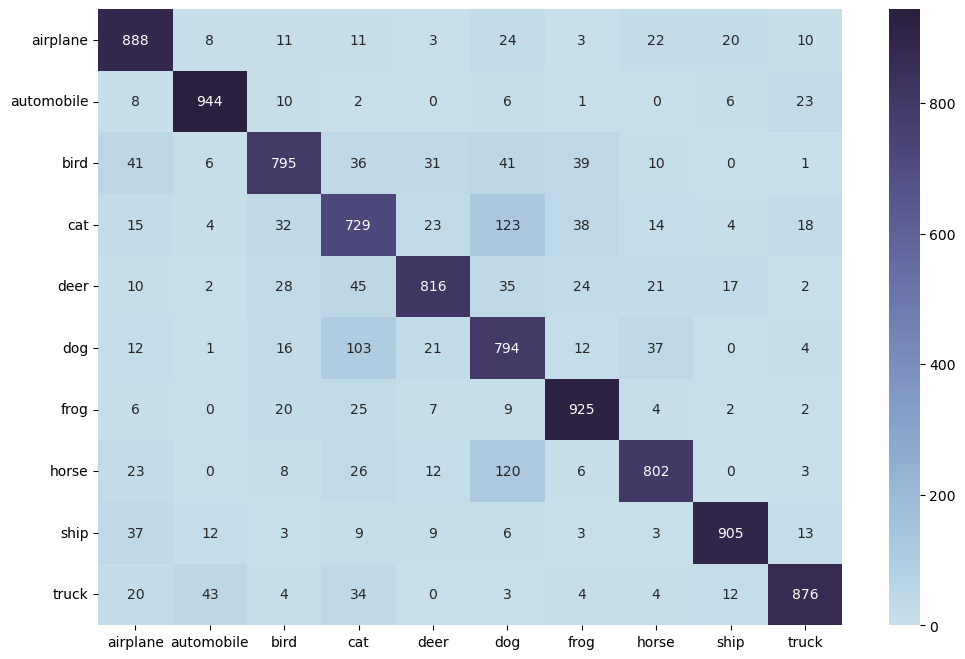

In [57]:
# model reverse distilled from step 1 oracle expert training with stochastic MoE training with 5 experts
m = 'new_cifar10_no_gate_self_information'

total_experts = 5
classes = classes_cifar10
num_epochs = 200
temps = [[1.0]*num_epochs]
test_loader = cifar10_testloader

w_importance_range = [0]

plot_expert_usage(m, 'moe_stochastic_model', test_loader=test_loader, temps=temps,
                  w_importance_range=w_importance_range, 
                  total_experts=total_experts,num_classes=num_classes,
                  classes=classes, num_epochs=num_epochs, 
                  fig_path=fig_path, model_path=model_path, 
                  dataset='CIFAR-10',  device=device)


Train Accuracy 0.006
Max Validation Accuracy 0.870
Min Validation Error 0.130
Mutual Information 0.000
Sample Entropy 0.026
Expert Usage 3.322
Best model index 1
new_cifar10_no_gate_self_information_10_10_models.pt


<Figure size 640x480 with 0 Axes>

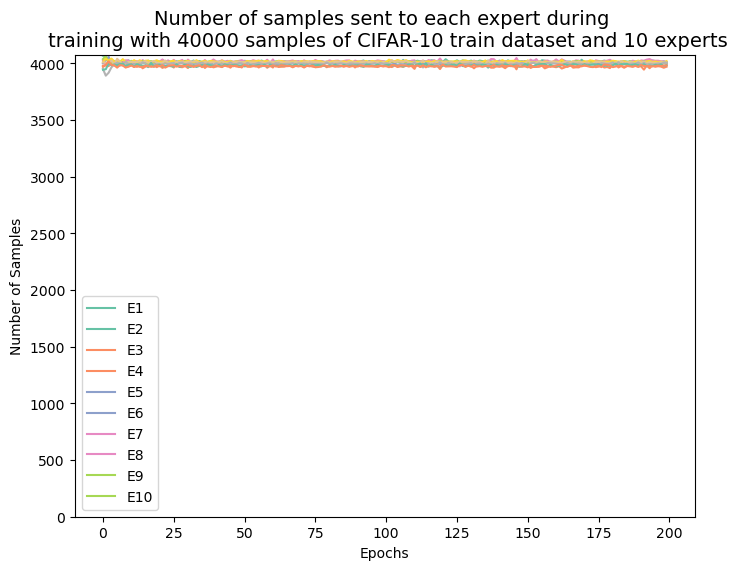

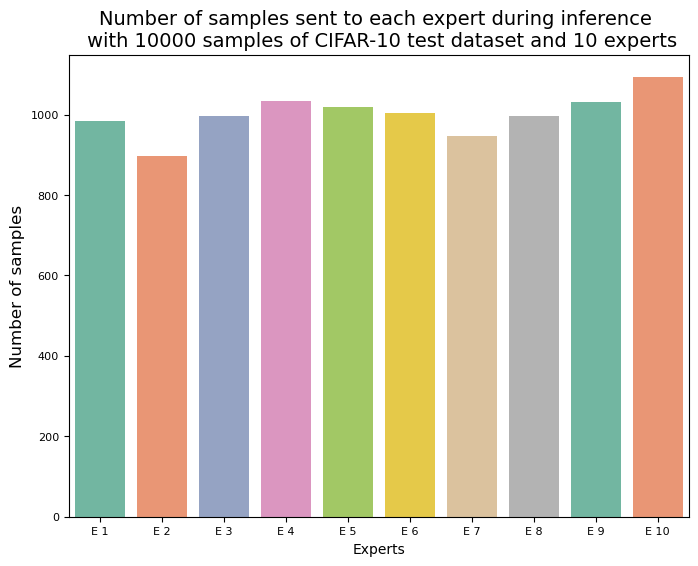

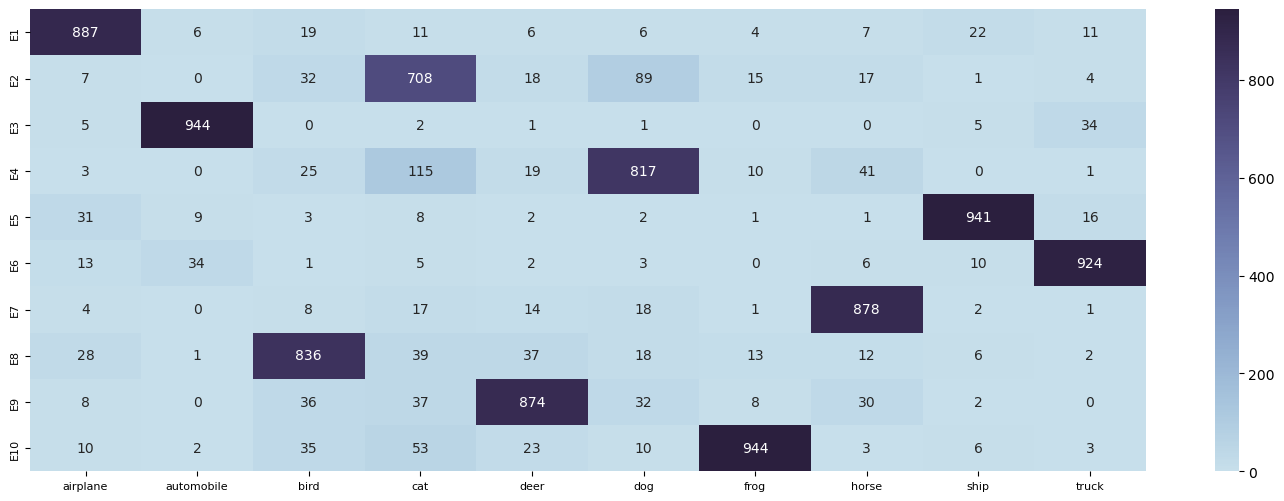

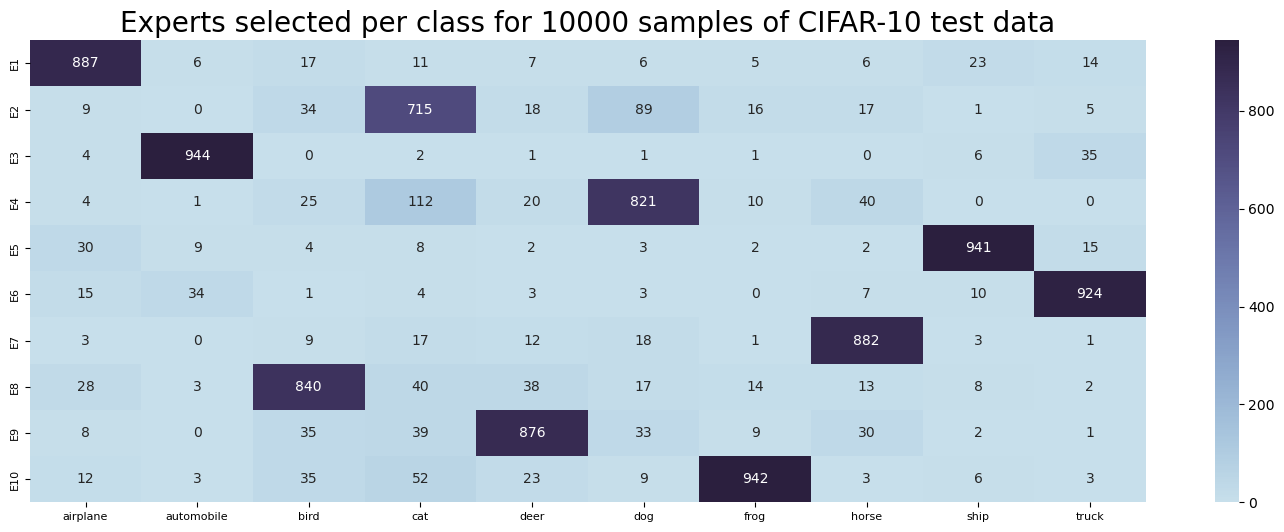

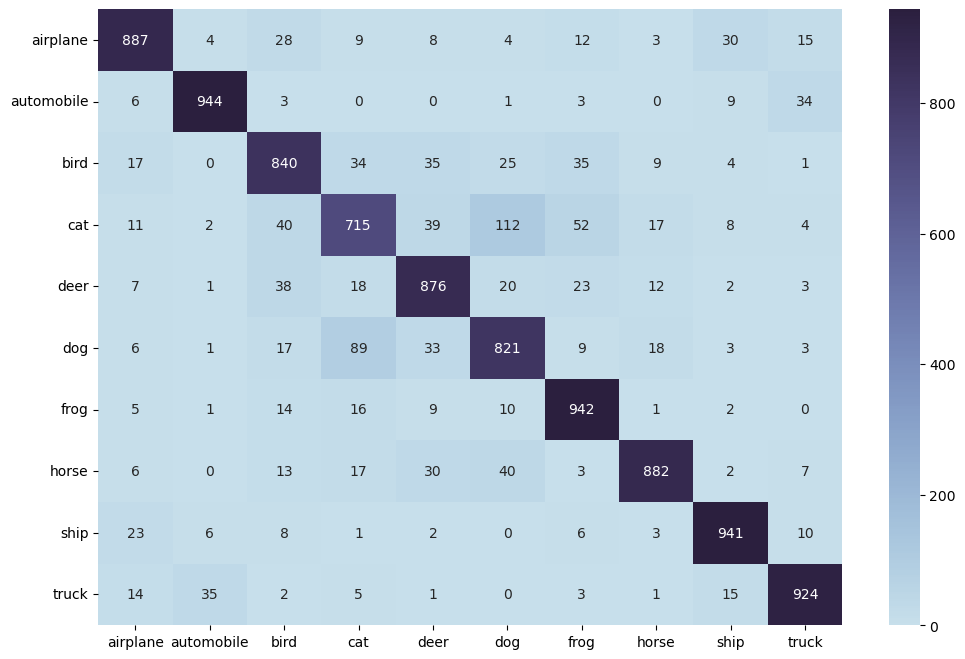

In [58]:
# model reverse distilled from step 1 oracle expert training with stochastic MoE training with 10 experts
m = 'new_cifar10_no_gate_self_information'

total_experts = 10
classes = classes_cifar10
num_epochs = 200
temps = [[1.0]*num_epochs]
test_loader = cifar10_testloader

w_importance_range = [0]

plot_expert_usage(m, 'moe_stochastic_model', test_loader=test_loader, temps=temps,
                  w_importance_range=w_importance_range, 
                  total_experts=total_experts,num_classes=num_classes,
                  classes=classes, num_epochs=num_epochs, 
                  fig_path=fig_path, model_path=model_path, 
                  dataset='CIFAR-10',  device=device)
